In [49]:
import aup
import pandas as pd
from keplergl import KeplerGl
import geopandas as gpd
#import hex_config
import boto3
import io
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
config = hex_config.config

NameError: name 'hex_config' is not defined

In [57]:
df = pd.read_json("../scripts/Metropolis_CVE.json")
cities = [c for c in df.columns.unique()]
c = cities[14]


In [58]:

# Creates empty GeoDataFrame to store specified municipality polygons
mun_gdf = gpd.GeoDataFrame()
#ageb_gdf = gpd.GeoDataFrame()
hex_bins = gpd.GeoDataFrame()
year = 2020
mpos_folder = f'mpos_{year}'


for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM marco.{mpos_folder} WHERE \"CVEGEO\" LIKE \'{m}\'"
    mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))
    #Creates query to download hex bins
    query = f"SELECT * FROM processed.hex_bins_index_{year} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    hex_bins = hex_bins.append(aup.gdf_from_query(query, geometry_col='geometry'))


<BarContainer object of 10 artists>

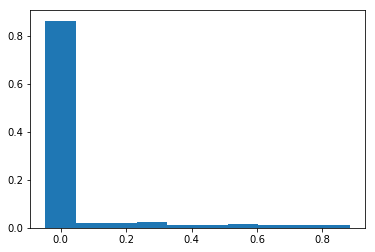

In [59]:
hex_bins['idx_accessibility'] = hex_bins['idx_accessibility'].round(2)
hist, bins = np.histogram(hex_bins['idx_accessibility'],bins=10)
plt.bar(bins[:-1], hist.astype(np.float32) / hist.sum(), width=(bins[1]-bins[0]))
#hex_bins['idx_accessibility'].hist(bins=10)

In [60]:
column = 'idx_accessibility'
#config['config']['visState']['layers'][0]['visualChannels']['colorField']['name'] = column
#config['config']['visState']['interactionConfig']['tooltip']['fieldsToShow']['data'][0]['name'] = column
hex_bins['d'] = 0
longitude = hex_bins.dissolve(by='d').geometry.centroid.x
latitude = hex_bins.dissolve(by='d').geometry.centroid.y
#config['config']['mapState']['latitude'] = latitude[0]
#config['config']['mapState']['longitude'] = longitude[0]

session = boto3.Session(profile_name="observatorio")
dev_s3_client = session.client("s3")

map_city = KeplerGl(height=800, data={'data':hex_bins[hex_bins['idx_accessibility'] > 0.05]})
#map_city.save_to_html(file_name='temp.html',read_only=True)
#with open('temp.html','rb') as f:
#    dev_s3_client.upload_fileobj(
#            f,
#            "ciudades-plots",
#            f"html/{c.replace(' ','-')}_{column}.html",
#            ExtraArgs={"ContentType": 'text/html', "ACL": "public-read"},
#        )
map_city

<ipython-input-60-c4f7a7051803>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  longitude = hex_bins.dissolve(by='d').geometry.centroid.x
<ipython-input-60-c4f7a7051803>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  latitude = hex_bins.dissolve(by='d').geometry.centroid.y
/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data':       idx_accessibility  idx_hospitales  idx_supermercado  idx_farmacias  \
317        …

In [51]:
map_city.config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': 'jsx1yd',
     'type': 'geojson',
     'config': {'dataId': 'data',
      'label': 'data',
      'color': [231, 159, 213],
      'columns': {'geojson': 'geometry'},
      'isVisible': True,
      'visConfig': {'opacity': 0.35,
       'strokeOpacity': 0.05,
       'thickness': 0.5,
       'strokeColor': [28, 27, 27],
       'colorRange': {'name': 'Custom Palette',
        'type': 'custom',
        'category': 'Custom',
        'colors': ['#FAE300', '#FD7900', '#CF1750', '#7A0DA6', '#2C51BE']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radius': 10,
       'sizeRange': [0, 10],
       'radiusRange': [0, 50],
       'heightRange': [0, 500],
       'elevationScale': 5,
       'stroked': True,
       'filled

In [ ]:
map_city.save_to_html(file_name=f'../output/html/{c}_farmacias.html')

In [15]:
with open('hex_config.py', 'w') as f:
   f.write('config = {}'.format(map_city.config))


In [6]:
hex_bins

,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados,idx_hospitales,idx_supermercado,idx_farmacias,idx_accessibility,d
0,"POLYGON ((-105.48878 28.11031, -105.48944 28.1...",88481a700dfffff,08021,7207.199000,9980.597000,6691.575667,4.668882e-04,3.374556e-17,1.325618e-18,1.554738e-04,0
1,"POLYGON ((-105.39842 28.21389, -105.39909 28.2...",88481a7ab3fffff,08021,5503.718250,8087.656750,4871.450500,3.723538e-03,3.094677e-12,5.845172e-14,1.239938e-03,0
2,"POLYGON ((-105.37169 28.24807, -105.37235 28.2...",88481a7883fffff,08021,8785.336500,11749.522500,8943.705500,6.689544e-05,2.443420e-23,6.603530e-23,2.227618e-05,0
3,"POLYGON ((-105.43842 28.08093, -105.43364 28.0...",88481a7323fffff,08021,10000.000000,12660.247000,10000.000000,2.459743e-05,3.221894e-26,3.221894e-26,8.190944e-06,0
4,"POLYGON ((-105.46420 28.12060, -105.46487 28.1...",88481a702dfffff,08021,4740.164167,6958.086958,4785.105625,1.276257e-02,5.321407e-12,7.055944e-12,4.249936e-03,0
...,...,...,...,...,...,...,...,...,...,...,...
346,"POLYGON ((-105.47617 28.45658, -105.48164 28.4...",88481a6c0bfffff,08045,10000.000000,32545.521750,10000.000000,8.002634e-15,3.221894e-26,3.221894e-26,2.664877e-15,0
347,"POLYGON ((-105.54328 28.41323, -105.54807 28.4...",88481a6527fffff,08045,10000.000000,28451.816000,10000.000000,7.184936e-13,3.221894e-26,3.221894e-26,2.392584e-13,0
348,"POLYGON ((-105.54539 28.38932, -105.54606 28.3...",88481a6529fffff,08045,7482.450600,24938.870600,7638.501600,3.408163e-11,8.841232e-20,2.354892e-19,1.134918e-11,0
349,"POLYGON ((-105.49045 28.24451, -105.49523 28.2...",88481a6221fffff,08045,3677.840500,5577.426500,4212.055500,5.564097e-02,1.942644e-10,5.557505e-09,1.852845e-02,0


In [10]:
f"https://ciudades-plots.s3.us-west-1.amazonaws.com/html/{c.replace(' ','-')}_{column}.html"

'https://ciudades-plots.s3.us-west-1.amazonaws.com/html/Aguascalientes_dist_hospitales.html'

In [45]:
df_ = df.T.copy().reset_index().drop(['mpos','edo'],axis=1)

In [46]:
columns = ['dist_farmacia','dist_hospitales','dist_supermercados','idx_accessibility']
for column in columns:
    title = column.replace('dist_','').replace('idx_accessibility','Índice Accesibilidad')
    df_[title] = df_['index'].apply(lambda x: f"[{title} {x}](https://ciudades-plots.s3.us-west-1.amazonaws.com/html/{x.replace(' ','-')}_{column}.html)" )
df_ = df_.rename({'index':'Ciudad'},axis=1).set_index('Ciudad')
df_.sort_index(inplace=True)

In [47]:
md = df_.to_markdown()
with open('../output/text/links_html.md','w') as f:
    f.write(md)

In [49]:
hex_bins

,geometry,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados,idx_hospitales,idx_supermercado,idx_farmacias,idx_accessibility,d
0,"POLYGON ((-105.48878 28.11031, -105.48944 28.1...",88481a700dfffff,08021,7207.199000,9980.597000,6691.575667,4.668882e-04,3.374556e-17,1.325618e-18,1.554738e-04,0
1,"POLYGON ((-105.39842 28.21389, -105.39909 28.2...",88481a7ab3fffff,08021,5503.718250,8087.656750,4871.450500,3.723538e-03,3.094677e-12,5.845172e-14,1.239938e-03,0
2,"POLYGON ((-105.37169 28.24807, -105.37235 28.2...",88481a7883fffff,08021,8785.336500,11749.522500,8943.705500,6.689544e-05,2.443420e-23,6.603530e-23,2.227618e-05,0
3,"POLYGON ((-105.43842 28.08093, -105.43364 28.0...",88481a7323fffff,08021,10000.000000,12660.247000,10000.000000,2.459743e-05,3.221894e-26,3.221894e-26,8.190944e-06,0
4,"POLYGON ((-105.46420 28.12060, -105.46487 28.1...",88481a702dfffff,08021,4740.164167,6958.086958,4785.105625,1.276257e-02,5.321407e-12,7.055944e-12,4.249936e-03,0
...,...,...,...,...,...,...,...,...,...,...,...
346,"POLYGON ((-105.47617 28.45658, -105.48164 28.4...",88481a6c0bfffff,08045,10000.000000,32545.521750,10000.000000,8.002634e-15,3.221894e-26,3.221894e-26,2.664877e-15,0
347,"POLYGON ((-105.54328 28.41323, -105.54807 28.4...",88481a6527fffff,08045,10000.000000,28451.816000,10000.000000,7.184936e-13,3.221894e-26,3.221894e-26,2.392584e-13,0
348,"POLYGON ((-105.54539 28.38932, -105.54606 28.3...",88481a6529fffff,08045,7482.450600,24938.870600,7638.501600,3.408163e-11,8.841232e-20,2.354892e-19,1.134918e-11,0
349,"POLYGON ((-105.49045 28.24451, -105.49523 28.2...",88481a6221fffff,08045,3677.840500,5577.426500,4212.055500,5.564097e-02,1.942644e-10,5.557505e-09,1.852845e-02,0
